# 📈 Load Prediction Model - Hourly and Weekly (ready_for_models.csv)

In this section, we build a predictive model for service call load based on the hour of day and day of the week.

The workflow includes:
- Data preparation
- Feature engineering
- Model training (Linear Regression and Random Forest)
- Model evaluation and visualization


In [3]:
# Install required libraries if needed
# !pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('../data/ready_for_models.csv', low_memory=False)
print(f"Data shape: {data.shape}")
data.head()


Data shape: (98048, 185)


,משך טיפול (בשעות),האם חג,Rain,Temp-R,Winter,Spring,Summer,Autumn,אגף_אגף גזברות,אגף_אגף החברה כלכלית,...,יישוב_מעברות,יישוב_משמר השרון,יישוב_מתחם קדם,יישוב_נעורים,יישוב_עולש,יישוב_עין החורש,יישוב_פארק תעשיות עמק חפר,יישוב_צוקי ים,יישוב_שושנת העמקים,חג
0,0.0,0,0.0,24,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0.0,24,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0.0,24,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0,0.0,24,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0.0,24,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 🗂️ Load and Inspect Data

We load the prepared dataset, where each row represents an hourly service call with encoded features.


In [4]:
# Create hour and weekday features from dummy variables

# Extract hour
hour_columns = [col for col in data.columns if col.startswith('שעה_')]
data['hour'] = data[hour_columns].idxmax(axis=1).str.replace('שעה_', '').astype(int)

# Extract weekday
weekday_columns = [col for col in data.columns if col.startswith('יום_')]
data['weekday'] = data[weekday_columns].idxmax(axis=1).str.replace('יום_', '')

# Create calls_count column
data['calls_count'] = 1

# Quick check
data[['hour', 'weekday', 'calls_count']].head()


,hour,weekday,calls_count
0,1,שלישי,1
1,4,שלישי,1
2,8,שלישי,1
3,9,שלישי,1
4,16,שלישי,1


## 🛠️ Feature Extraction

We reconstruct the 'hour' and 'weekday' features from one-hot encoded columns.


In [5]:
# 📊 Group by hour and weekday
grouped = data.groupby(['hour', 'weekday']).agg(calls_count=('calls_count', 'sum')).reset_index()

print("✅ Aggregated data:")
print(grouped.head())


✅ Aggregated data:
   hour weekday  calls_count
0     0   חמישי          373
1     0   ראשון          464
2     0   רביעי          425
3     0     שבת           82
4     0    שישי          112


## 📊 Aggregate Calls by Hour and Weekday

We group the data to calculate the total number of calls for each hour of the day and each day of the week.


In [6]:
# ✨ Encode weekday as dummy variables
grouped_encoded = pd.get_dummies(grouped, columns=['weekday'])

# Define features and target
X = grouped_encoded.drop('calls_count', axis=1)
y = grouped_encoded['calls_count']

print(f"✅ X shape: {X.shape}")
print(f"✅ y shape: {y.shape}")


✅ X shape: (168, 8)
✅ y shape: (168,)


## ✨ Feature Encoding

We one-hot encode the 'weekday' feature to allow the model to learn from categorical information.


In [7]:
# 🛠️ Split into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Train set shape: {X_train.shape}")
print(f"✅ Test set shape: {X_test.shape}")


✅ Train set shape: (134, 8)
✅ Test set shape: (34, 8)


## 🛠️ Train/Test Split

We split the dataset into training and testing sets (80% train, 20% test) to evaluate model performance.


In [8]:
# 🚀 Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_pred_linear = linear_model.predict(X_test)

# Evaluate
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print("=== Linear Regression Results ===")
print(f"MAE: {mae_linear:.2f}")
print(f"RMSE: {rmse_linear:.2f}")
print(f"R2 Score: {r2_linear:.2f}")


=== Linear Regression Results ===
MAE: 266.54
RMSE: 323.19
R2 Score: 0.26


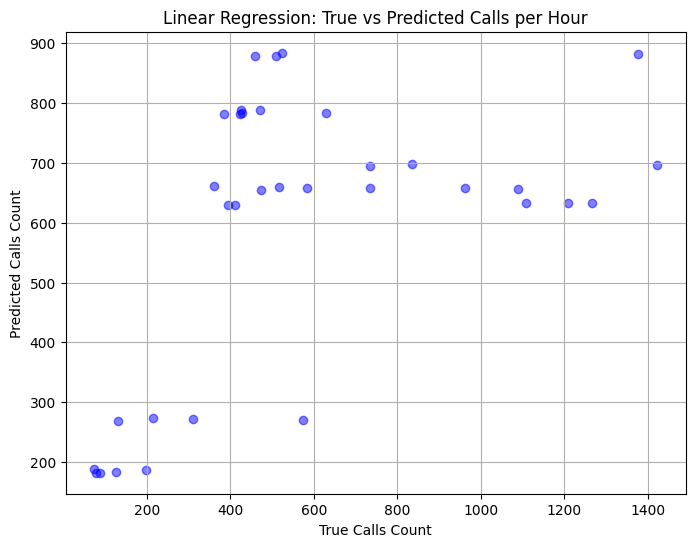

In [13]:
# 📈 Plot True vs Predicted (Linear Regression)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='blue')
plt.xlabel('True Calls Count')
plt.ylabel('Predicted Calls Count')
plt.title('Linear Regression: True vs Predicted Calls per Hour')
plt.grid(True)
plt.show()


In [9]:
# 🚀 Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("=== Random Forest Results ===")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R2 Score: {r2_rf:.2f}")


=== Random Forest Results ===
MAE: 33.81
RMSE: 47.80
R2 Score: 0.98


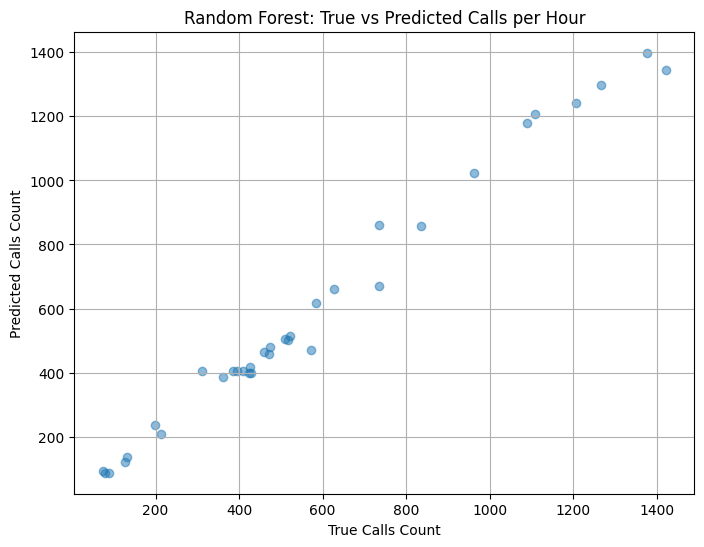

In [10]:
# 📈 Plot True vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('True Calls Count')
plt.ylabel('Predicted Calls Count')
plt.title('Random Forest: True vs Predicted Calls per Hour')
plt.grid(True)
plt.show()


## 📋 Feature Importance (Random Forest)

We analyze which features are most influential for predicting call load.


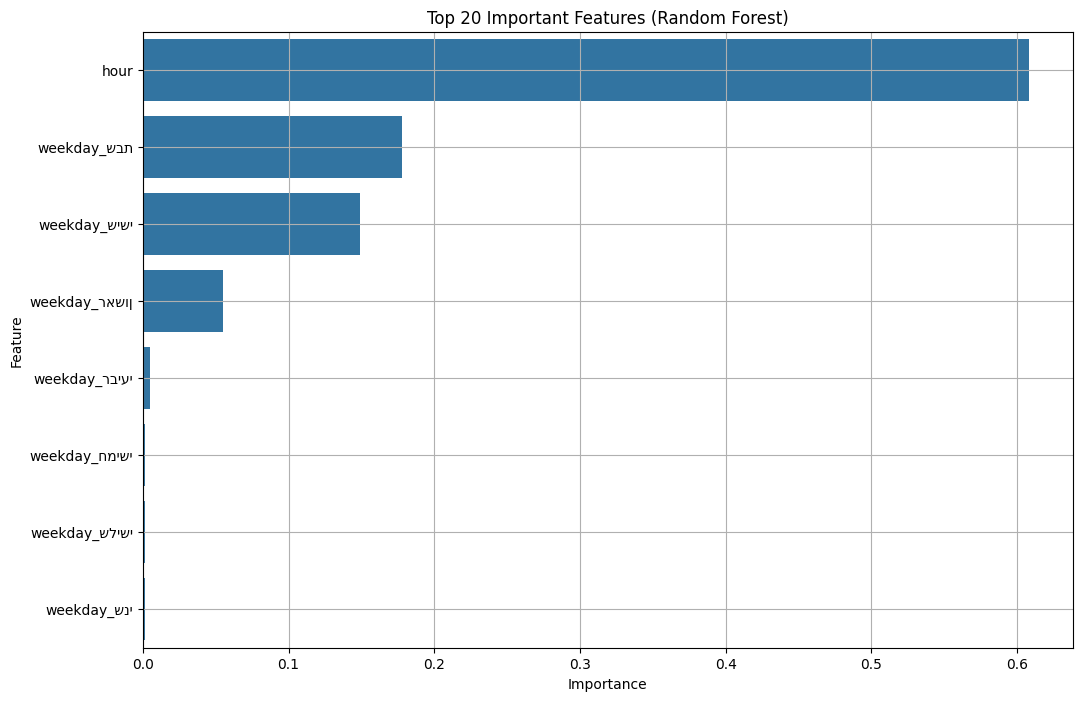

In [11]:
# 📊 Feature Importance (Random Forest)
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Important Features (Random Forest)')
plt.grid(True)
plt.show()
